# Fonte

https://www.kaggle.com/code/dev523/quantum-model-on-a-real-dataset/notebook

---

### Imports

In [118]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.decomposition import PCA

from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.utils import algorithm_globals
from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.circuit.library import EfficientSU2

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import clear_output

import time


---

### EDA

In [119]:
iris_data = load_iris()
df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
df["class"] = pd.Series(iris_data.target)

In [120]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [121]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [122]:
df.shape

(150, 5)

In [123]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                  int64
dtype: object

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [125]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [126]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
class                 3
dtype: int64

In [127]:
df.sample(25)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
73,6.1,2.8,4.7,1.2,1
43,5.0,3.5,1.6,0.6,0
45,4.8,3.0,1.4,0.3,0
39,5.1,3.4,1.5,0.2,0
138,6.0,3.0,4.8,1.8,2
58,6.6,2.9,4.6,1.3,1
71,6.1,2.8,4.0,1.3,1
28,5.2,3.4,1.4,0.2,0
51,6.4,3.2,4.5,1.5,1
135,7.7,3.0,6.1,2.3,2


In [128]:
df["class"].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [129]:
for col in df.columns:
    if col != "class":
        print(f"Column: {col}\n\tMean: {df[col].mean()}")

Column: sepal length (cm)
	Mean: 5.843333333333334
Column: sepal width (cm)
	Mean: 3.0573333333333337
Column: petal length (cm)
	Mean: 3.7580000000000005
Column: petal width (cm)
	Mean: 1.1993333333333336


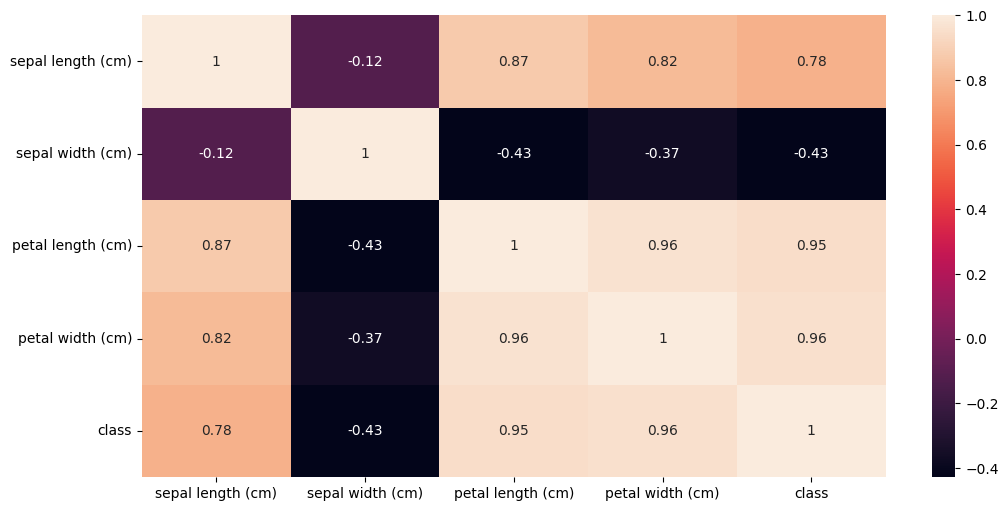

In [130]:
sns.heatmap(df.corr(), annot = True);

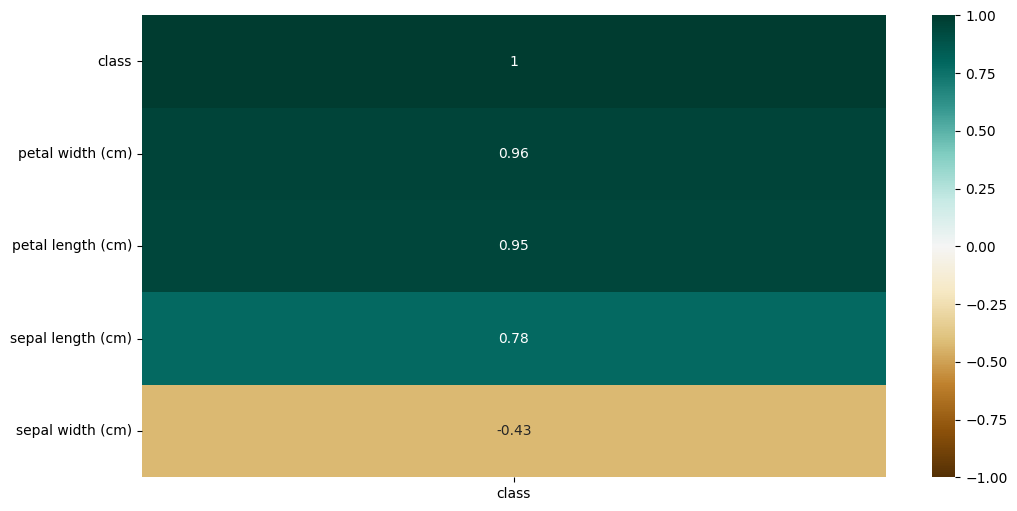

In [131]:
sns.heatmap(
    df.corr()[["class"]].sort_values(by="class", ascending=False),
    vmin=-1,
    vmax=1,
    cmap="BrBG",
    annot=True,
);

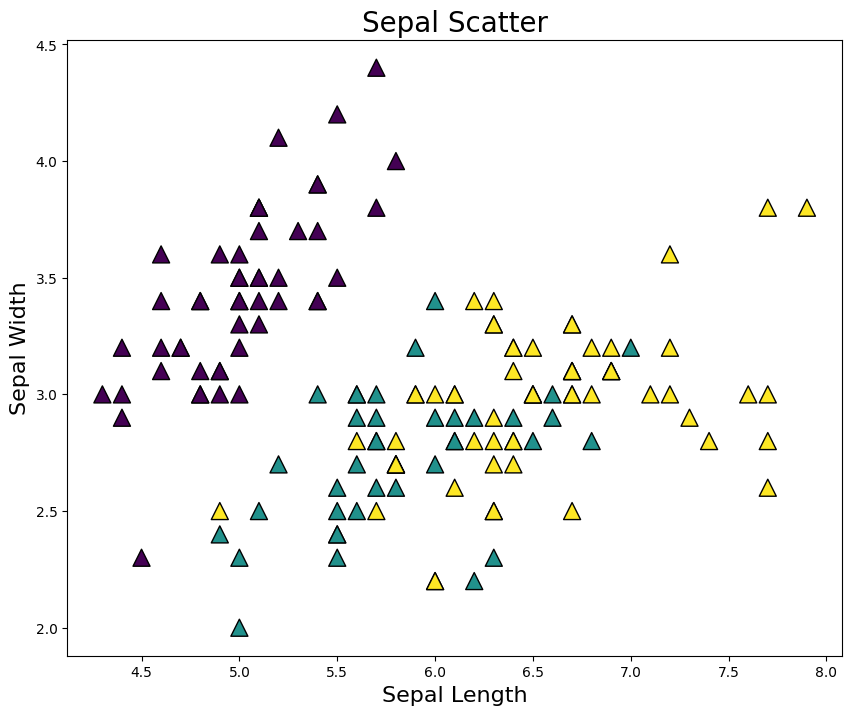

In [132]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.scatter(
    x=df["sepal length (cm)"], y=df["sepal width (cm)"], c=df["class"], s=150, marker="^", edgecolors="k"
)

plt.title("Sepal Scatter", fontsize=20)
plt.xlabel("Sepal Length", fontsize=16)
plt.ylabel("Sepal Width", fontsize=16)

plt.show()

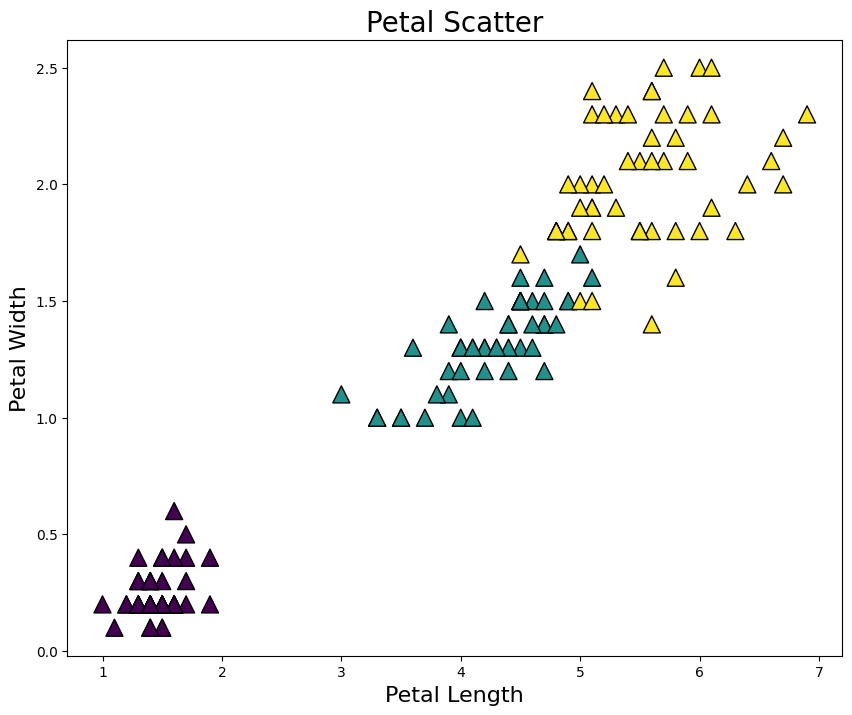

In [133]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.scatter(
    x=df["petal length (cm)"], y=df["petal width (cm)"], c=df["class"], s=150, marker="^", edgecolors="k"
)

plt.title("Petal Scatter", fontsize=20)
plt.xlabel("Petal Length", fontsize=16)
plt.ylabel("Petal Width", fontsize=16)

plt.show()

In [134]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


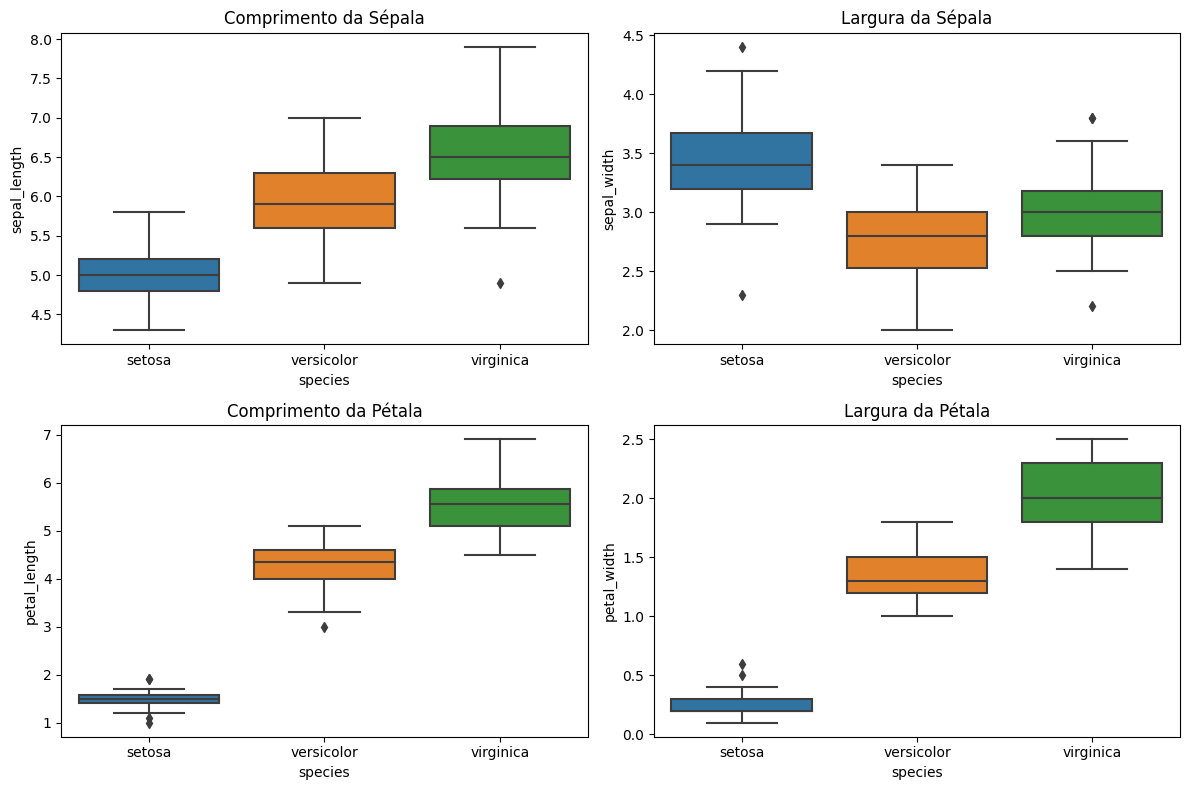

In [135]:
iris = sns.load_dataset("iris")

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x="species", y="sepal_length", data=iris)
plt.title("Comprimento da Sépala")

plt.subplot(2, 2, 2)
sns.boxplot(x="species", y="sepal_width", data=iris)
plt.title("Largura da Sépala")

plt.subplot(2, 2, 3)
sns.boxplot(x="species", y="petal_length", data=iris)
plt.title("Comprimento da Pétala")

plt.subplot(2, 2, 4)
sns.boxplot(x="species", y="petal_width", data=iris)
plt.title("Largura da Pétala")

plt.tight_layout()

plt.show()

---

### Data Cleaning

In [136]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [137]:
df.rename(columns = {
    "sepal length (cm)": "sepal_length",
    "sepal width (cm)": "sepal_width",
    "petal length (cm)": "petal_length",
    "petal width (cm)": "petal_width",
}, inplace = True)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


---

### Traditional Modelling

In [138]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [139]:
features = iris_data.data
labels = iris_data.target

In [140]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [141]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [142]:
features = MinMaxScaler().fit_transform(features)
features

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [143]:
algorithm_globals.random_seed = 42
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size = 0.8, random_state = algorithm_globals.random_seed
)

In [144]:
train_features

array([[0.08333333, 0.66666667, 0.        , 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.66666667, 0.45833333, 0.57627119, 0.54166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.02777778, 0.5       , 0.05084746, 0.04166667],
       [0.55555556, 0.20833333, 0.6779661 , 0.75      ],
       [0.58333333, 0.5       , 0.59322034, 0.58333333],
       [0.25      , 0.625     , 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.25      , 0.875     , 0.08474576, 0.        ],
       [0.41666667, 0.29166667, 0.69491525, 0.75      ],
       [0.47222222, 0.58333333, 0.59322034, 0.625     ],
       [0.66666667, 0.45833333, 0.62711864, 0.58333333],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.33333333, 0.16666667, 0.45762712, 0.375     ],
       [0.55555556, 0.33333333, 0.69491525, 0.58333333],
       [0.58333333, 0.45833333,

In [145]:
test_features

array([[0.5       , 0.33333333, 0.62711864, 0.45833333],
       [0.38888889, 0.75      , 0.11864407, 0.08333333],
       [0.94444444, 0.25      , 1.        , 0.91666667],
       [0.47222222, 0.375     , 0.59322034, 0.58333333],
       [0.69444444, 0.33333333, 0.6440678 , 0.54166667],
       [0.30555556, 0.58333333, 0.08474576, 0.125     ],
       [0.36111111, 0.375     , 0.44067797, 0.5       ],
       [0.72222222, 0.45833333, 0.69491525, 0.91666667],
       [0.52777778, 0.08333333, 0.59322034, 0.58333333],
       [0.41666667, 0.29166667, 0.49152542, 0.45833333],
       [0.61111111, 0.5       , 0.69491525, 0.79166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.33333333, 0.625     , 0.05084746, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.22222222, 0.75      , 0.08474576, 0.08333333],
       [0.55555556, 0.54166667, 0.62711864, 0.625     ],
       [0.61111111, 0.41666667, 0.81355932, 0.875     ],
       [0.36111111, 0.20833333,

In [146]:
train_labels

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [147]:
test_labels

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [148]:
model_svc = SVC()
model_svc.fit(train_features, train_labels)

SVC()

In [149]:
train_score_svc = model_svc.score(train_features, train_labels)
test_score_svc = model_svc.score(test_features, test_labels)

print(f"Traditional SVC on the training dataset: {train_score_svc:.2f}")
print(f"Traditional SVC on the test dataset:     {test_score_svc:.2f}")

Traditional SVC on the training dataset: 0.97
Traditional SVC on the test dataset:     1.00


In [150]:
df_preds = pd.DataFrame(columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

novos_dados = [[5.1, 3.5, 1.4, 0.2],
               [6.2, 2.9, 4.3, 1.3],
               [7.7, 3.0, 6.1, 2.3]]

classes_reais = [0, 1, 2]


previsoes = model_svc.predict(novos_dados)

df_preds['sepal_length'] = [dados[0] for dados in novos_dados]
df_preds['sepal_width'] = [dados[1] for dados in novos_dados]
df_preds['petal_length'] = [dados[2] for dados in novos_dados]
df_preds['petal_width'] = [dados[3] for dados in novos_dados]
df_preds['classe_real'] = classes_reais
df_preds['previsoes_svc'] = previsoes

In [151]:
df_preds

,sepal_length,sepal_width,petal_length,petal_width,classe_real,previsoes_svc
0,5.1,3.5,1.4,0.2,0,2
1,6.2,2.9,4.3,1.3,1,2
2,7.7,3.0,6.1,2.3,2,2


---


### Quantum Machine Learning

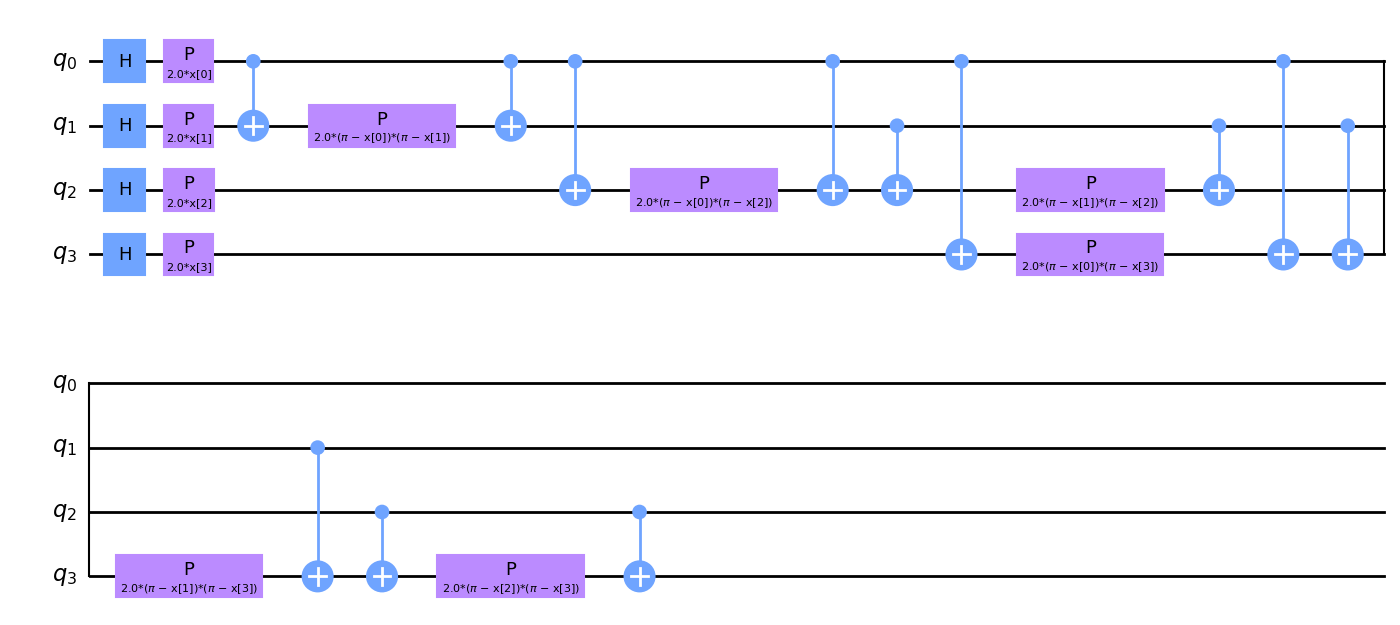

In [152]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension = num_features, reps = 1)
feature_map.decompose().draw(output = "mpl", fold = 20)

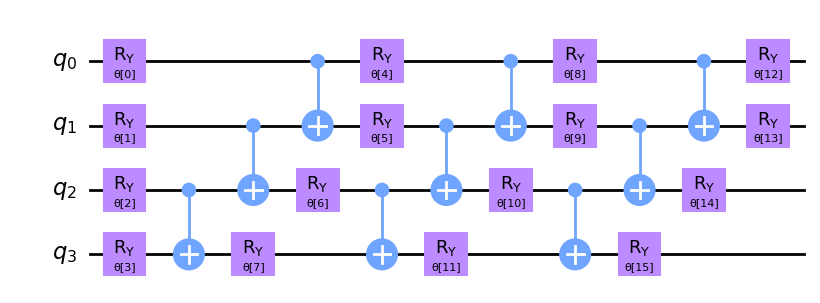

In [153]:
ansatz = RealAmplitudes(num_qubits = num_features, reps = 3)
ansatz.decompose().draw(output = "mpl", fold = 20)

In [154]:
optimizer = COBYLA(maxiter = 100)

In [155]:
sampler = Sampler()

In [156]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait = True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

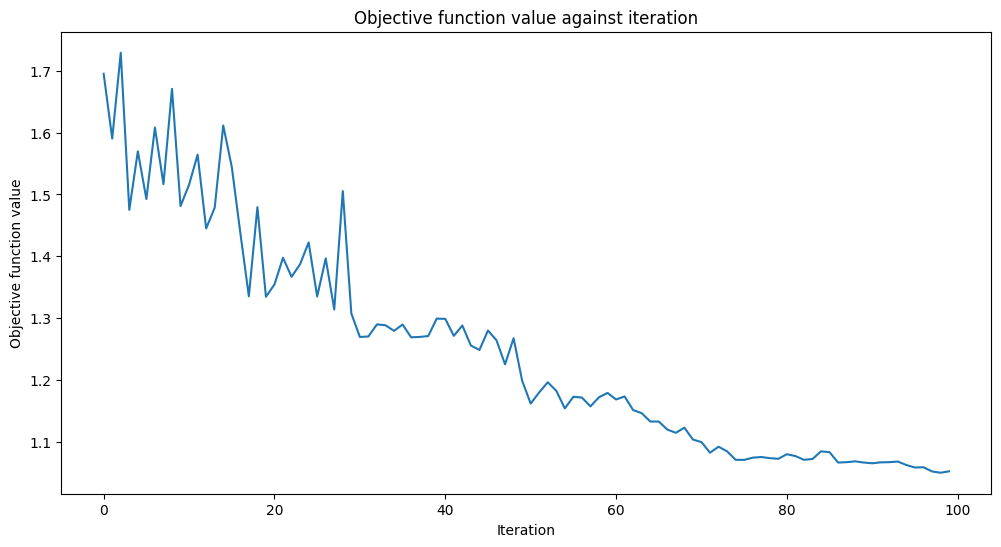

Training time: 46 seconds


In [157]:
vqc = VQC(
    sampler = sampler,
    feature_map = feature_map,
    ansatz = ansatz,
    optimizer = optimizer,
    callback = callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [158]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.82
Quantum VQC on the test dataset:     0.87


### Reducing features

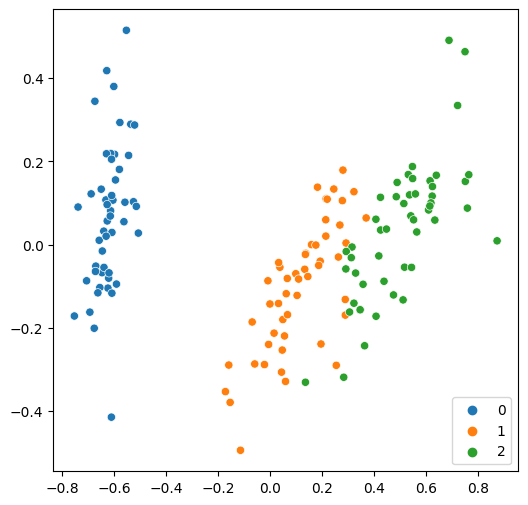

In [159]:
features = PCA(n_components = 2).fit_transform(features)

plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x = features[:, 0], y = features[:, 1], hue = labels, palette = "tab10");

In [160]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size = 0.8, random_state = algorithm_globals.random_seed
)

model_svc.fit(train_features, train_labels)

train_score_c2 = model_svc.score(train_features, train_labels)
test_score_c2 = model_svc.score(test_features, test_labels)

print(f"Traditional SVC on the training dataset: {train_score_c2:.2f}")
print(f"Traditional SVC on the test dataset:     {test_score_c2:.2f}")

Traditional SVC on the training dataset: 0.96
Traditional SVC on the test dataset:     0.97


In [161]:
novos_dados = [[5.1, 3.5, 1.4, 0.2],
               [6.2, 2.9, 4.3, 1.3],
               [7.7, 3.0, 6.1, 2.3]]

novos_dados = PCA(n_components = 2).fit_transform(novos_dados)

previsoes = model_svc.predict(novos_dados)

df_preds['previsoes_svc_pca'] = previsoes

In [162]:
df_preds

,sepal_length,sepal_width,petal_length,petal_width,classe_real,previsoes_svc,previsoes_svc_pca
0,5.1,3.5,1.4,0.2,0,2,2
1,6.2,2.9,4.3,1.3,1,2,0
2,7.7,3.0,6.1,2.3,2,2,2


In [163]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension = num_features, reps = 1)
ansatz = RealAmplitudes(num_qubits = num_features, reps = 3)

In [164]:
optimizer = COBYLA(maxiter = 40)

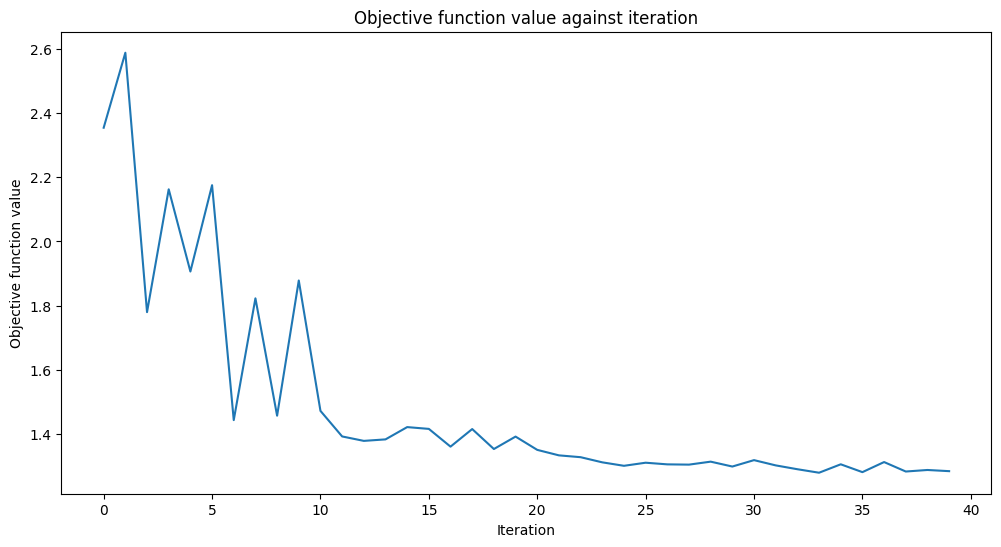

Training time: 10 seconds


In [165]:
vqc = VQC(
    sampler = sampler,
    feature_map = feature_map,
    ansatz = ansatz,
    optimizer = optimizer,
    callback = callback_graph,
)

objective_func_vals = []

plt.rcParams["figure.figsize"] = (12, 6)


start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [166]:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.49
Quantum VQC on the test dataset using RealAmplitudes:     0.60


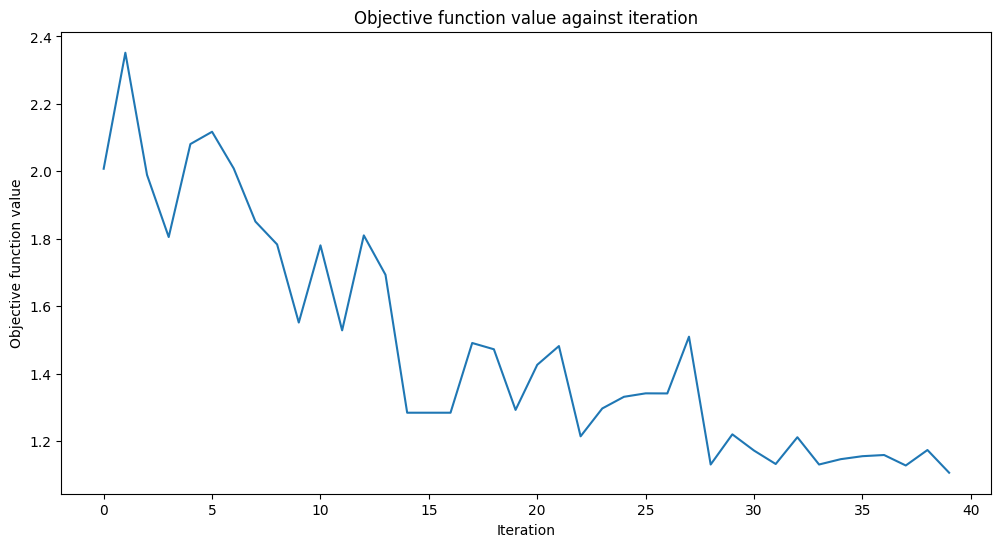

Training time: 12 seconds


In [167]:
ansatz = EfficientSU2(num_qubits = num_features, reps=3)
optimizer = COBYLA(maxiter = 40)

vqc = VQC(
    sampler = sampler,
    feature_map = feature_map,
    ansatz = ansatz,
    optimizer = optimizer,
    callback = callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [168]:
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.73
Quantum VQC on the test dataset using EfficientSU2:     0.80


In [169]:
previsoes = vqc.predict(novos_dados)

df_preds['previsoes_quantum_vqc'] = previsoes
df_preds

,sepal_length,sepal_width,petal_length,petal_width,classe_real,previsoes_svc,previsoes_svc_pca,previsoes_quantum_vqc
0,5.1,3.5,1.4,0.2,0,2,2,1
1,6.2,2.9,4.3,1.3,1,2,0,1
2,7.7,3.0,6.1,2.3,2,2,2,1


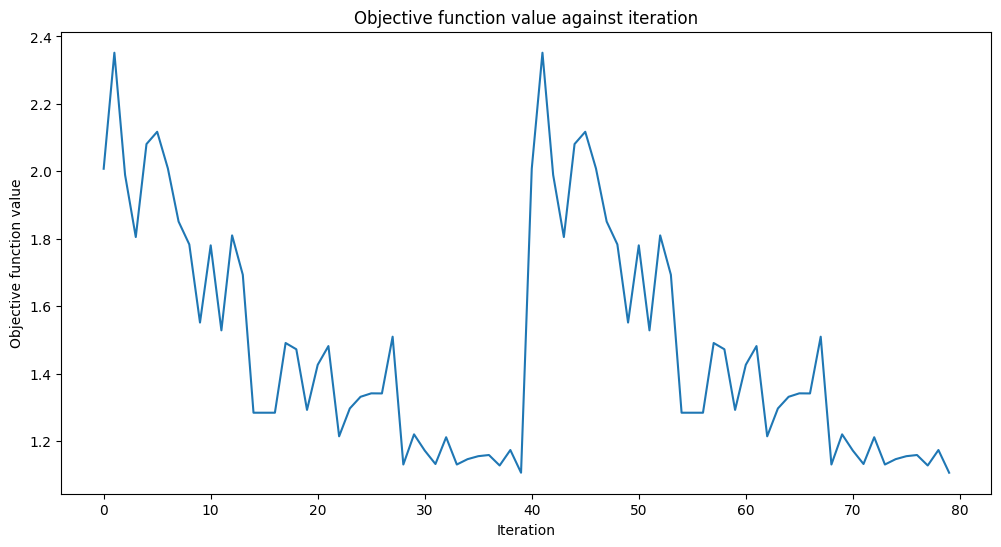

Training VQC time: 12 seconds


In [170]:
start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training VQC time: {round(elapsed)} seconds")

In [172]:
start = time.time()
model_svc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training SVC time: {elapsed} seconds")

Training SVC time: 0.0016350746154785156 seconds
